In [42]:
# import libraries related to Dickey–Fuller, SARIMAX
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
# import root mean square error(rmse)
from sklearn.metrics import mean_squared_error

In [63]:
# remove all the warnings.
import warnings
warnings.filterwarnings('ignore')

In [90]:
df = pd.read_csv("Data.csv", index_col=['Date'], parse_dates=['Date']) # parse date function not working with excel.

In [91]:
# Convert Object to String. Then remove comma and convert to integer.
def deleteCommma(x):
    x = str(x)
    return int(x.replace(',',''))

In [92]:
# Iterate over each value of 'Monthly Usage', run deleteComma function and store value to new list.
newData = []
for x in df['Monthly Usage']:
    newData.append(deleteCommma(x))

In [93]:
# Create a new column with the new values.
df['usage'] = newData

In [94]:
# Remove the 'Monthly Usage' column
df = df.drop('Monthly Usage',1)

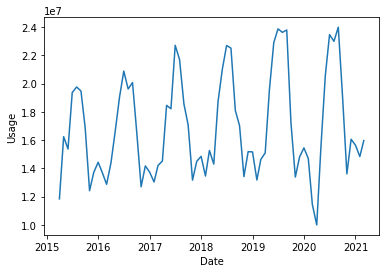

In [95]:
# Plot the data
plt.xlabel('Date')
plt.ylabel('Usage')
plt.plot(df)

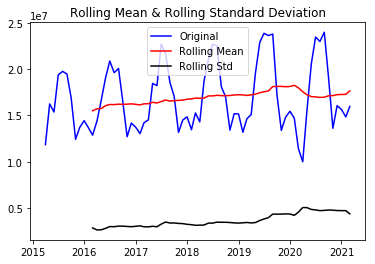

In [101]:
rolling_mean = df.rolling(window = 12).mean()
rolling_std = df.rolling(window = 12).std()
plt.plot(df, color = 'blue', label = 'Original')
plt.plot(rolling_mean, color = 'red', label = 'Rolling Mean')
plt.plot(rolling_std, color = 'black', label = 'Rolling Std')
plt.legend(loc = 'best')
plt.title('Rolling Mean & Rolling Standard Deviation')
plt.show()

In [100]:
result = adfuller(df['usage'])
print('p-value: '+ str(result[1]))

p-value: 0.29666501834072245


In [72]:
## p-value is greater than the threshold (0.05). Thus, we can conclude that the time series is not stationary.

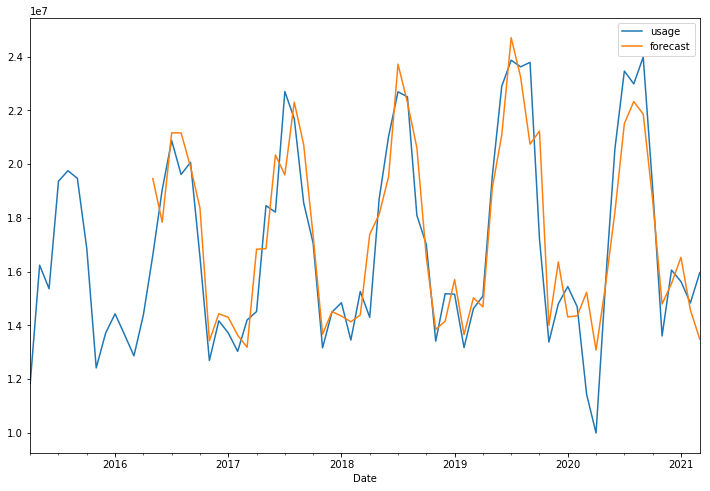

In [121]:
model=sm.tsa.statespace.SARIMAX(df['usage'],order=(2, 1, 2),seasonal_order=(2,1,1,12))
results=model.fit() # train the data
df['forecast']=results.predict(start='2016-05-01',end='2021-12-01') # predict values in specific time range
df[['usage','forecast']].plot(figsize=(12,8))

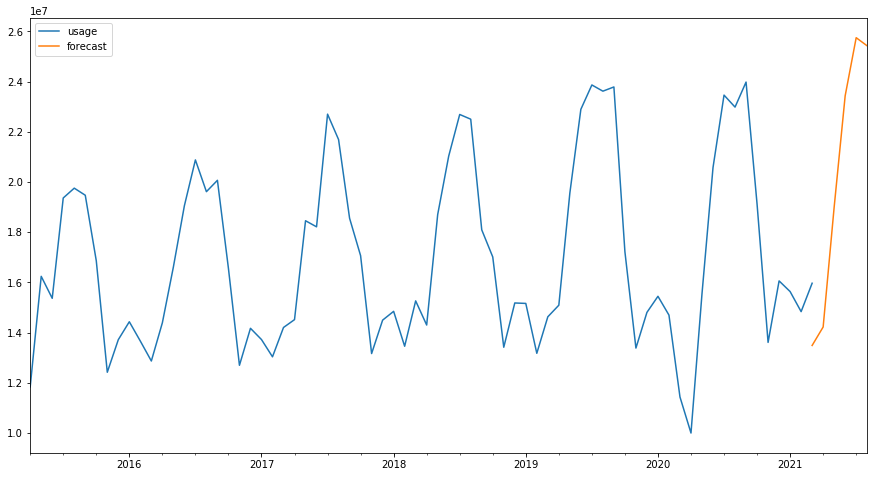

In [125]:
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ DateOffset(months=x)for x in range(0,6)]
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)

future_df=pd.concat([df,future_datest_df])

future_df['forecast'] = results.predict(start='2021-03-01',end='2021-09-01')
future_df[['usage', 'forecast']].plot(figsize=(15, 8))

2021-03-01    1.348539e+07
2021-04-01    1.422143e+07
2021-05-01    1.899900e+07
2021-06-01    2.343624e+07
2021-07-01    2.575032e+07
2021-08-01    2.542423e+07
Name: forecast, dtype: float64


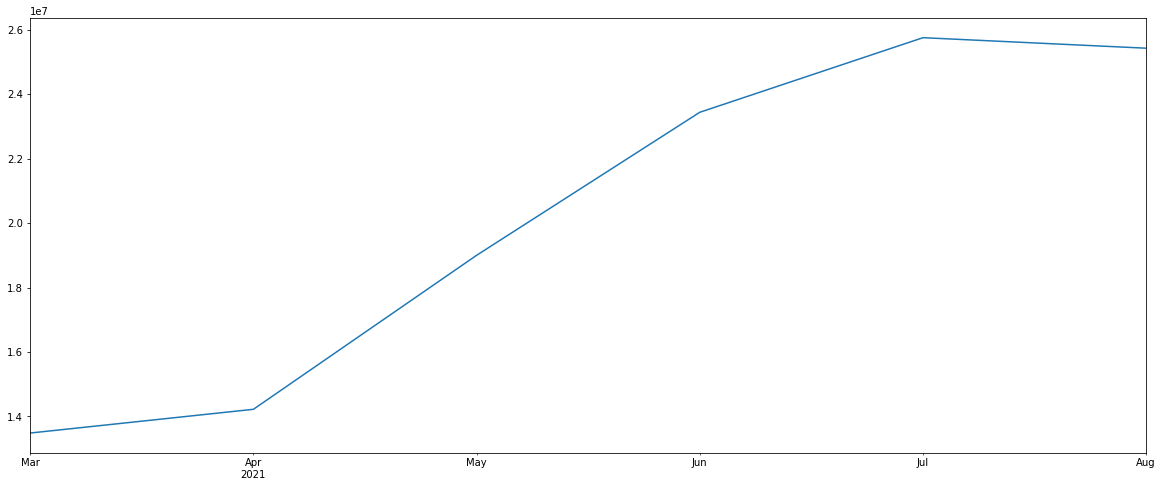

In [131]:
future_df['forecast'].dropna().plot(figsize=(20, 8))
print(future_df['forecast'].dropna())

In [143]:
rmse = mean_squared_error(df['usage'].loc['2016-03-01':'2021-03-01'], results.predict(start='2016-03-01',end='2021-03-01'), squared=False)

In [144]:
rmse

1859633.6795955682